# squidpy analysis & viz after mapping NC subtypes

Zhiyuan \
24 Apr 2024 \
last modified 24 Apr 2024

run it after projects_ox/merscope/analysis/clustering_mapping/code/20240424run1_tangran_merscopeNC_multiomeNC.ipynb.ipynb

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import anndata

import scanpy as sc
import squidpy as sq

sc.logging.print_header()

/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.5 anndata==0.10.1 umap==0.5.4 numpy==1.26.4 scipy==1.11.3 pandas==2.2.1 scikit-learn==1.3.2 statsmodels==0.14.0 igraph==0.9.11 pynndescent==0.5.10


In [2]:
ad_sp = sc.read_h5ad("/home/huzhiy/projects_ox/merscope/analysis/clustering_mapping/results/run1/run1_tangram_out_NConly_20240424.h5ad")
ad_sp_all = sc.read_h5ad("/home/huzhiy/projects_ox/merscope/analysis/clustering_mapping/results/run1/run1_tangram_out_ALLcells_vswanger_20240424.h5ad")

/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


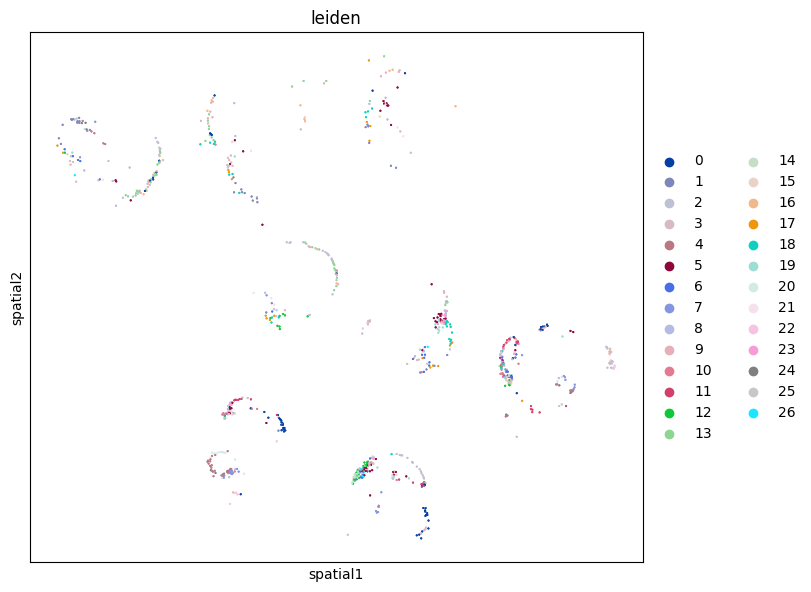

In [3]:
sq.pl.spatial_scatter(
    ad_sp[ad_sp.obsm['spatial'][:, 1] <= 5000].copy(),
    color="leiden",
    shape=None,
    figsize=(8,12), size = 1
)

/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


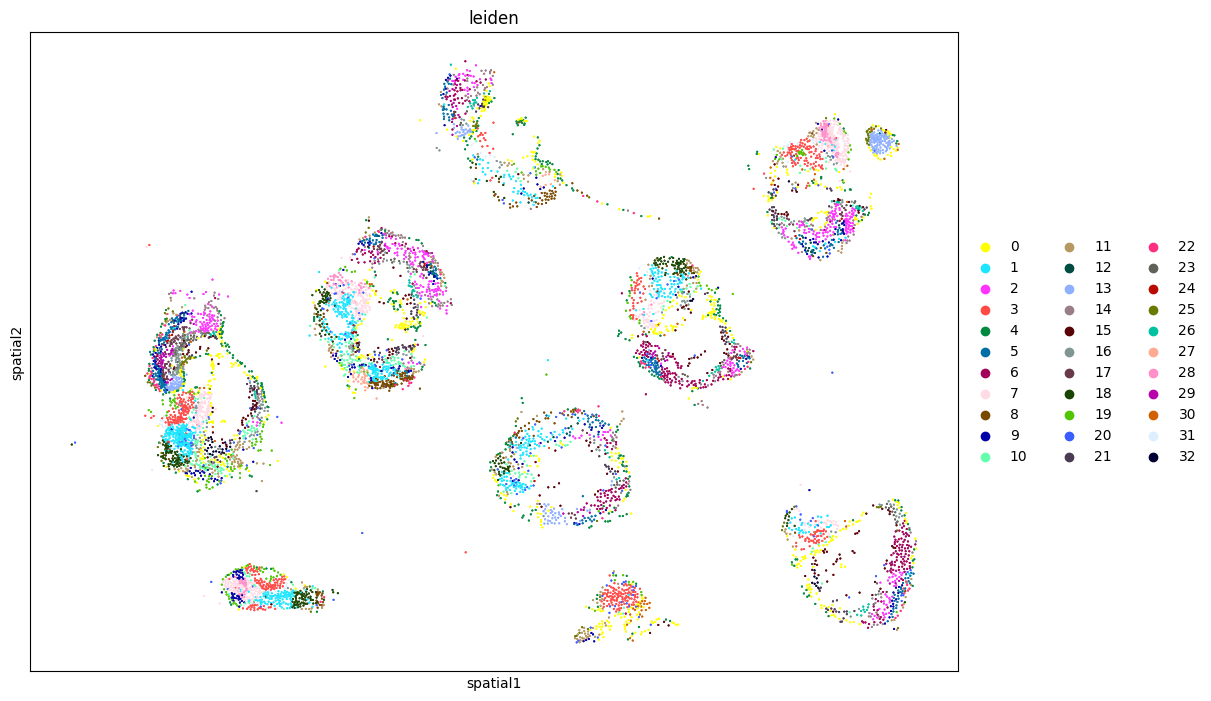

In [4]:
sq.pl.spatial_scatter(
    ad_sp_all[ad_sp_all.obsm['spatial'][:, 1] > 6100].copy(),
    color="leiden",
    shape=None,
    figsize=(12,12), size = 1
)

In [5]:
anno = pd.read_csv("/home/huzhiy/projects_ox/merscope/analysis/clustering_mapping/data/run1_manual_curation_NCstates20240424.tsv", sep='\t')
anno[0:10]

leiden             cell_type
0       0             mNC_vagal
1       1             dNC_nohox
2       2              NC_trunk
3       3             mNC_nohox
4       4     Pigment_sox6_high
5       5  mNC_head_mesenchymal
6       6  mNC_head_mesenchymal
7       7             mNC_nohox
8       8             mNC_nohox
9       9     NC_trunk,NPB_hox3

In [6]:
# Convert 'leiden' to string if it's not already, to ensure matching types with AnnData
anno['leiden'] = anno['leiden'].astype(str)
# Create a dictionary mapping 'leiden' to 'cell_type'
leiden_to_celltype = dict(zip(anno['leiden'], anno['cell_type']))
# Ensure the 'leiden' in AnnData is a string, if it's numeric or otherwise
ad_sp.obs['leiden'] = ad_sp.obs['leiden'].astype(str)

# Map cell_type using the dictionary
ad_sp.obs['cell_type'] = ad_sp.obs['leiden'].map(leiden_to_celltype)

In [7]:
colours_df=pd.read_csv("/home/huzhiy/projects_ox/multiome/analysis_newref/clustering/figures/for_pre/df_coloursUserd.csv")
# Convert the first and third columns to a dictionary
col_dict = dict(zip(colours_df['cell_type'].tolist(), colours_df['colour'].tolist()))
col_dict


{'NPB_hox3': '#A6CEE3',
 'NPB_hox2': '#79B1D3',
 'NPB_nohox': '#4C94C3',
 'NPB_nohox_cycling': '#1F78B4',
 'NC_trunk': '#F781BF',
 'dNC_hox34': '#B2DF8A',
 'dNC_hoxa2b': '#87CA6A',
 'dNC_nohox': '#5DB54B',
 'dNC_nohox_cycling': '#33A02C',
 'mNC_vagal': '#FB9A99',
 'mNC_arch2': '#EF595A',
 'mNC_nohox': '#E31A1C',
 'mNC_hox34': '#66C2A5',
 'mNC_arch1': '#FC8D62',
 'mNC_head_mesenchymal': '#8DA0CB',
 'Mutant_hox3': '#BEBADA',
 'Mutant_hox2': '#CDABC0',
 'Mutant_nohox_12_22ss': '#DC9DA6',
 'Mutant_nohox_cycling': '#EB8E8C',
 'Mutant_nohox_early': '#FB8072',
 'Mutant_pigment': '#CAB2D6',
 'Pigment_gch2_high': '#9A77B8',
 'Pigment_sox6_high': '#6A3D9A'}

In [8]:
my_palette = {'NPB_hox3': '#A6CEE3',
 'NPB_hox2': '#79B1D3',
 # 'NPB_nohox': '#4C94C3',
 'NC_trunk': '#F781BF',
 'NC_trunk,NPB_hox3': '#F781BF',
 'dNC_hox34': '#B2DF8A',
 # 'dNC_hoxa2b': '#87CA6A',
 'dNC_nohox': '#5DB54B',
 # 'dNC_nohox_cycling': '#33A02C',
 'mNC_vagal': '#FB9A99',
 'mNC_arch2': '#EF595A',
 'mNC_nohox': '#E31A1C',
 'mNC_hox34': '#66C2A5',
 'mNC_arch1': '#FC8D62',
 'mNC_head_mesenchymal': '#8DA0CB',
 'Pigment_gch2_high': '#9A77B8',
 'Pigment_sox6_high': '#6A3D9A',
 # 'NA': '#D3D3D3'
             }
from matplotlib.colors import ListedColormap
# Create a ListedColormap from the list of colors
custom_colormap = ListedColormap(list(my_palette.values()))
custom_colormap

ad_sp.obs['cell_type'] = pd.Categorical(ad_sp.obs['cell_type'],
                                                        categories=my_palette.keys(),
                                                        ordered=True)

In [9]:
ad_sp.obs['cell_type']

1705254700003100462_region_0               mNC_nohox
1705254700003100515_region_0               dNC_nohox
1705254700003100530_region_0               dNC_nohox
1705254700003100543_region_0               dNC_nohox
1705254700003100552_region_0               mNC_hox34
                                        ...         
1705260600008100496_region_9                NC_trunk
1705260600008100508_region_9    mNC_head_mesenchymal
1705260600008200346_region_9                NPB_hox3
1705260600008200348_region_9                NPB_hox3
1705260600008200355_region_9       NC_trunk,NPB_hox3
Name: cell_type, Length: 1545, dtype: category
Categories (14, object): ['NPB_hox3' < 'NPB_hox2' < 'NC_trunk' < 'NC_trunk,NPB_hox3' ... 'mNC_arch1' < 'mNC_head_mesenchymal' < 'Pigment_gch2_high' < 'Pigment_sox6_high']

In [12]:
ad_sp_all.obs['NC_states'] = "Non_NC"
# Map cell_type to NC_states based on the index
ad_sp_all.obs.loc[ad_sp.obs.index, 'NC_states'] = ad_sp.obs['cell_type']
# Print a summary to verify the changes
print(ad_sp_all.obs['NC_states'].head())

1705254700003100421_region_0       Non_NC
1705254700003100442_region_0       Non_NC
1705254700003100443_region_0       Non_NC
1705254700003100450_region_0       Non_NC
1705254700003100462_region_0    mNC_nohox
Name: NC_states, dtype: object


In [13]:
my_palette = {'NPB_hox3': '#A6CEE3',
 'NPB_hox2': '#79B1D3',
 # 'NPB_nohox': '#4C94C3',
 'NC_trunk': '#F781BF',
 'NC_trunk,NPB_hox3': '#F781BF',
 'dNC_hox34': '#B2DF8A',
 # 'dNC_hoxa2b': '#87CA6A',
 'dNC_nohox': '#5DB54B',
 # 'dNC_nohox_cycling': '#33A02C',
 'mNC_vagal': '#FB9A99',
 'mNC_arch2': '#EF595A',
 'mNC_nohox': '#E31A1C',
 'mNC_hox34': '#66C2A5',
 'mNC_arch1': '#FC8D62',
 'mNC_head_mesenchymal': '#8DA0CB',
 'Pigment_gch2_high': '#9A77B8',
 'Pigment_sox6_high': '#6A3D9A',
 'Non_NC': '#D3D3D3'
             }
from matplotlib.colors import ListedColormap
# Create a ListedColormap from the list of colors
custom_colormap = ListedColormap(list(my_palette.values()))
custom_colormap

ad_sp_all.obs['NC_states'] = pd.Categorical(ad_sp_all.obs['NC_states'],
                                                        categories=my_palette.keys(),
                                                        ordered=True)

/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


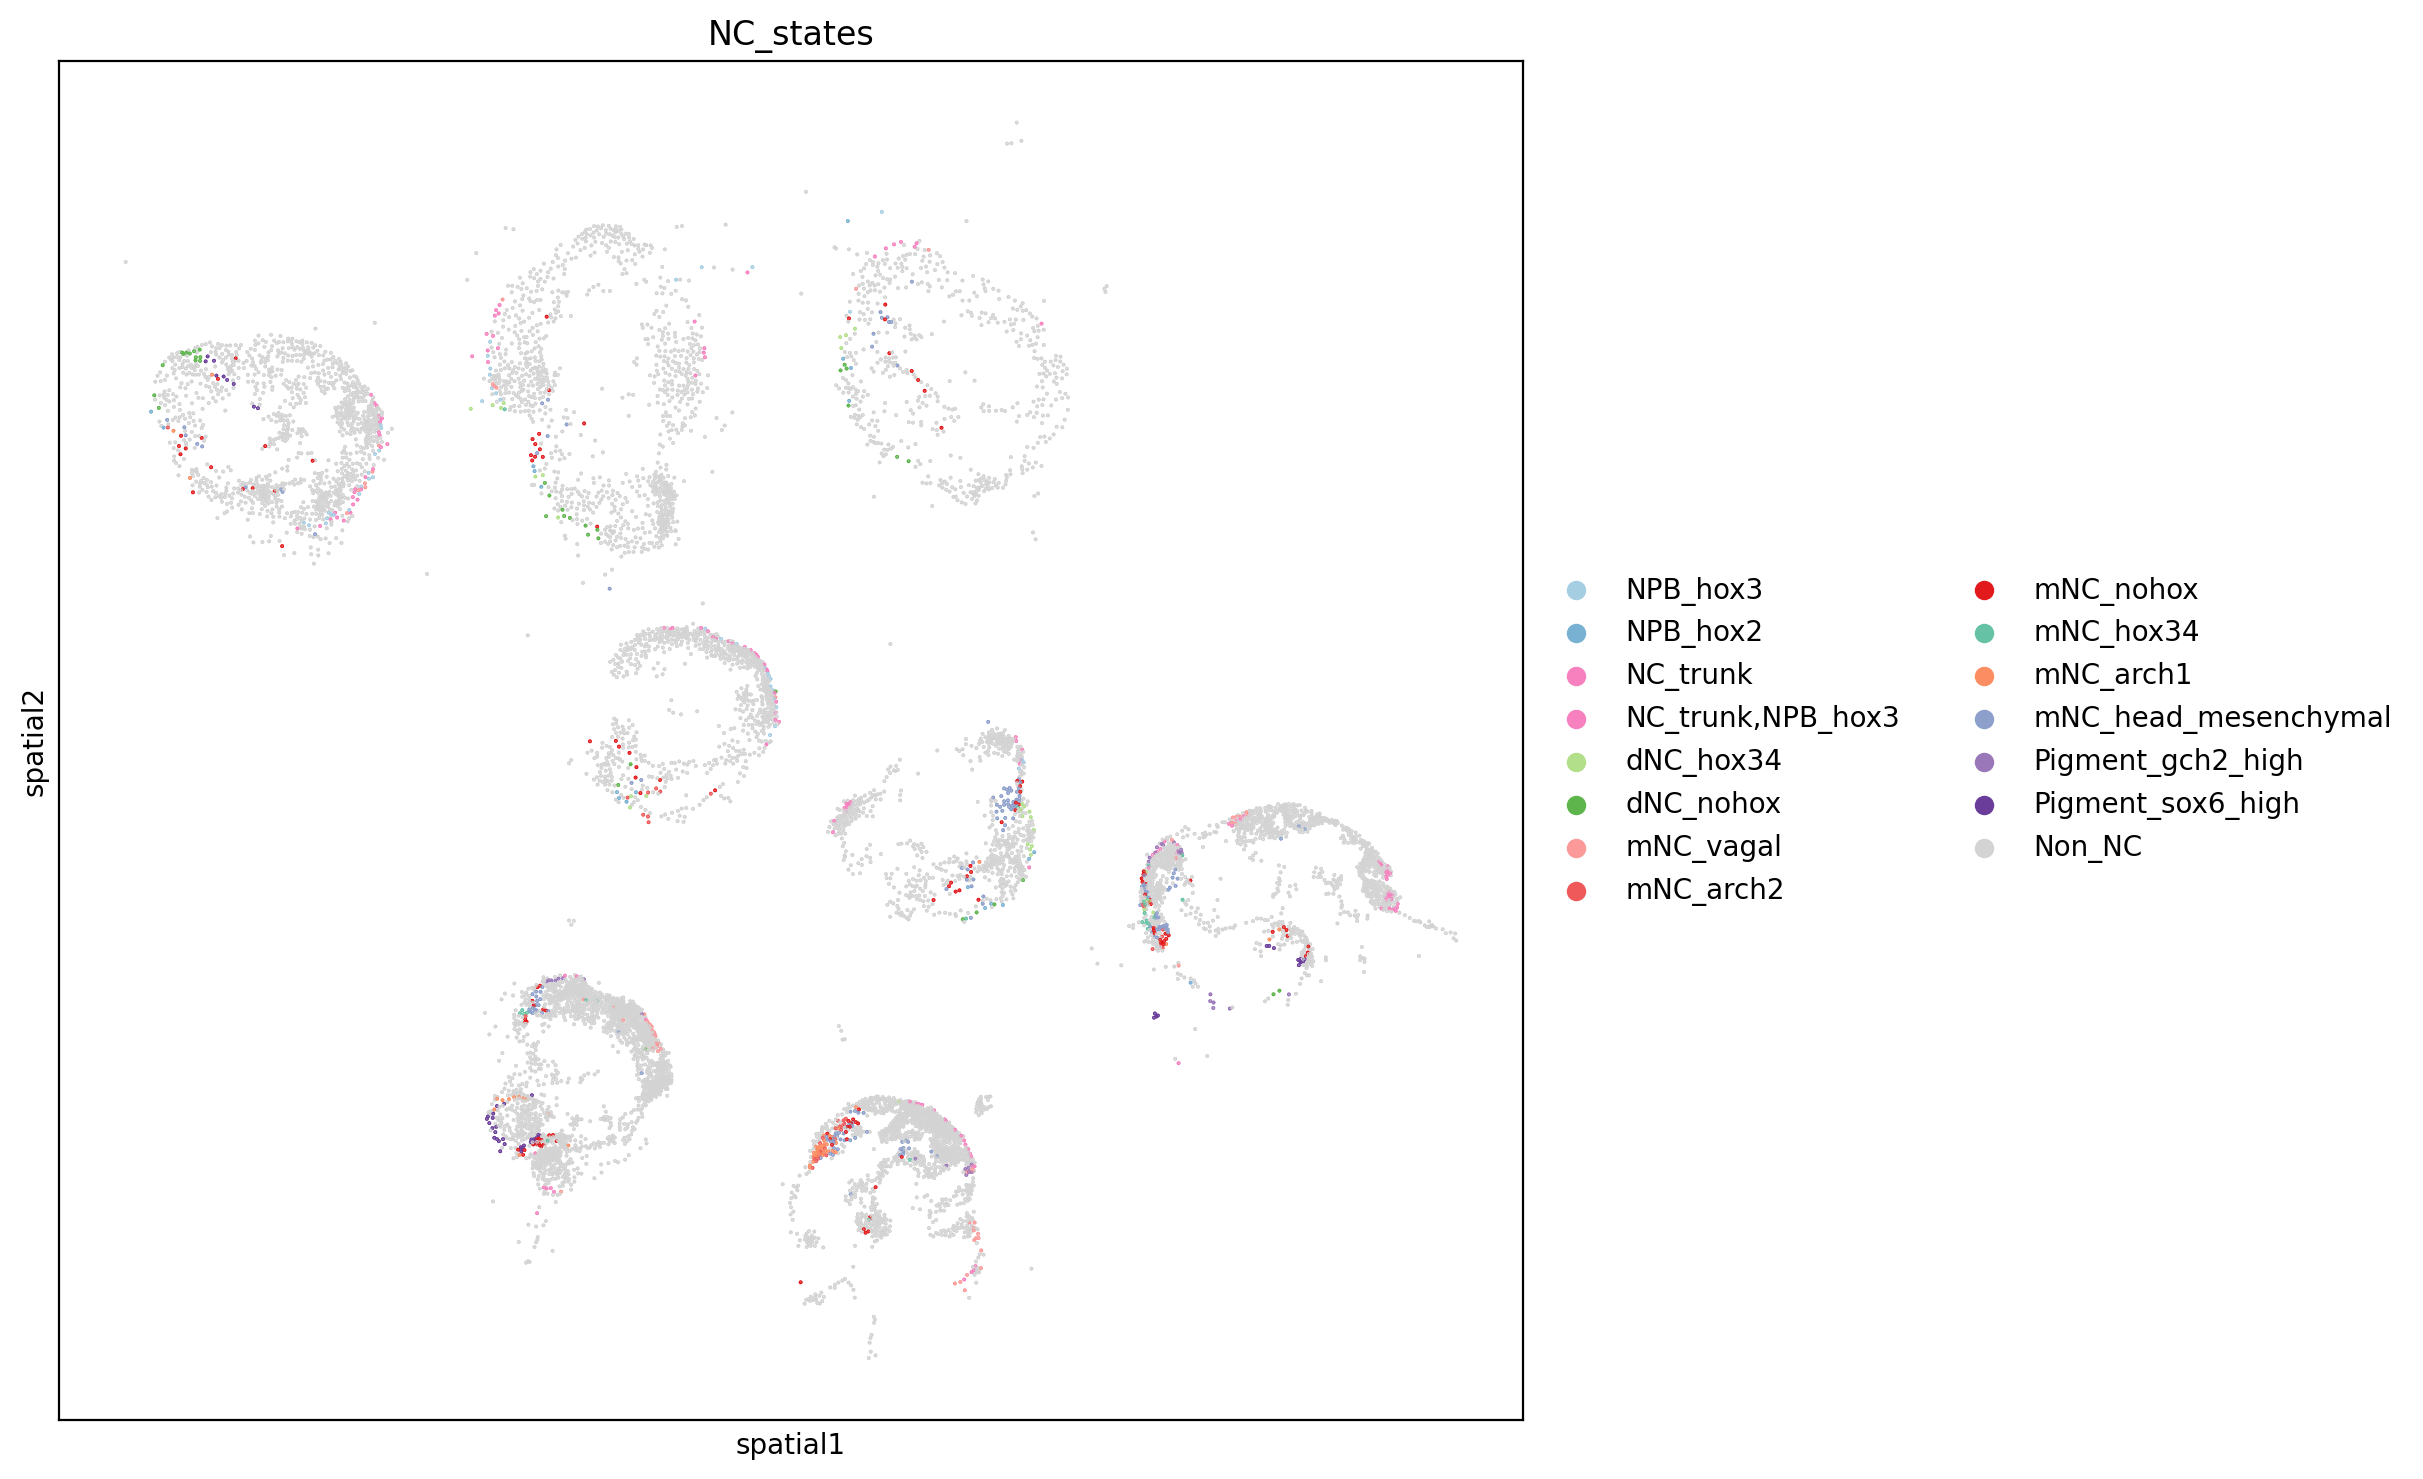

In [14]:
sq.pl.spatial_scatter(
    ad_sp_all[ad_sp_all.obsm['spatial'][:, 1] <= 5000].copy(),
    shape=None,
    color=[
        "NC_states",
    ],figsize=(12,12), size = 0.5,
    wspace=0,palette=custom_colormap,
    dpi=200, save="/home/huzhiy/projects_ox/merscope/analysis/clustering_mapping/figures/run1/ad_sp_all_NCstates_bottom.pdf"
)

/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


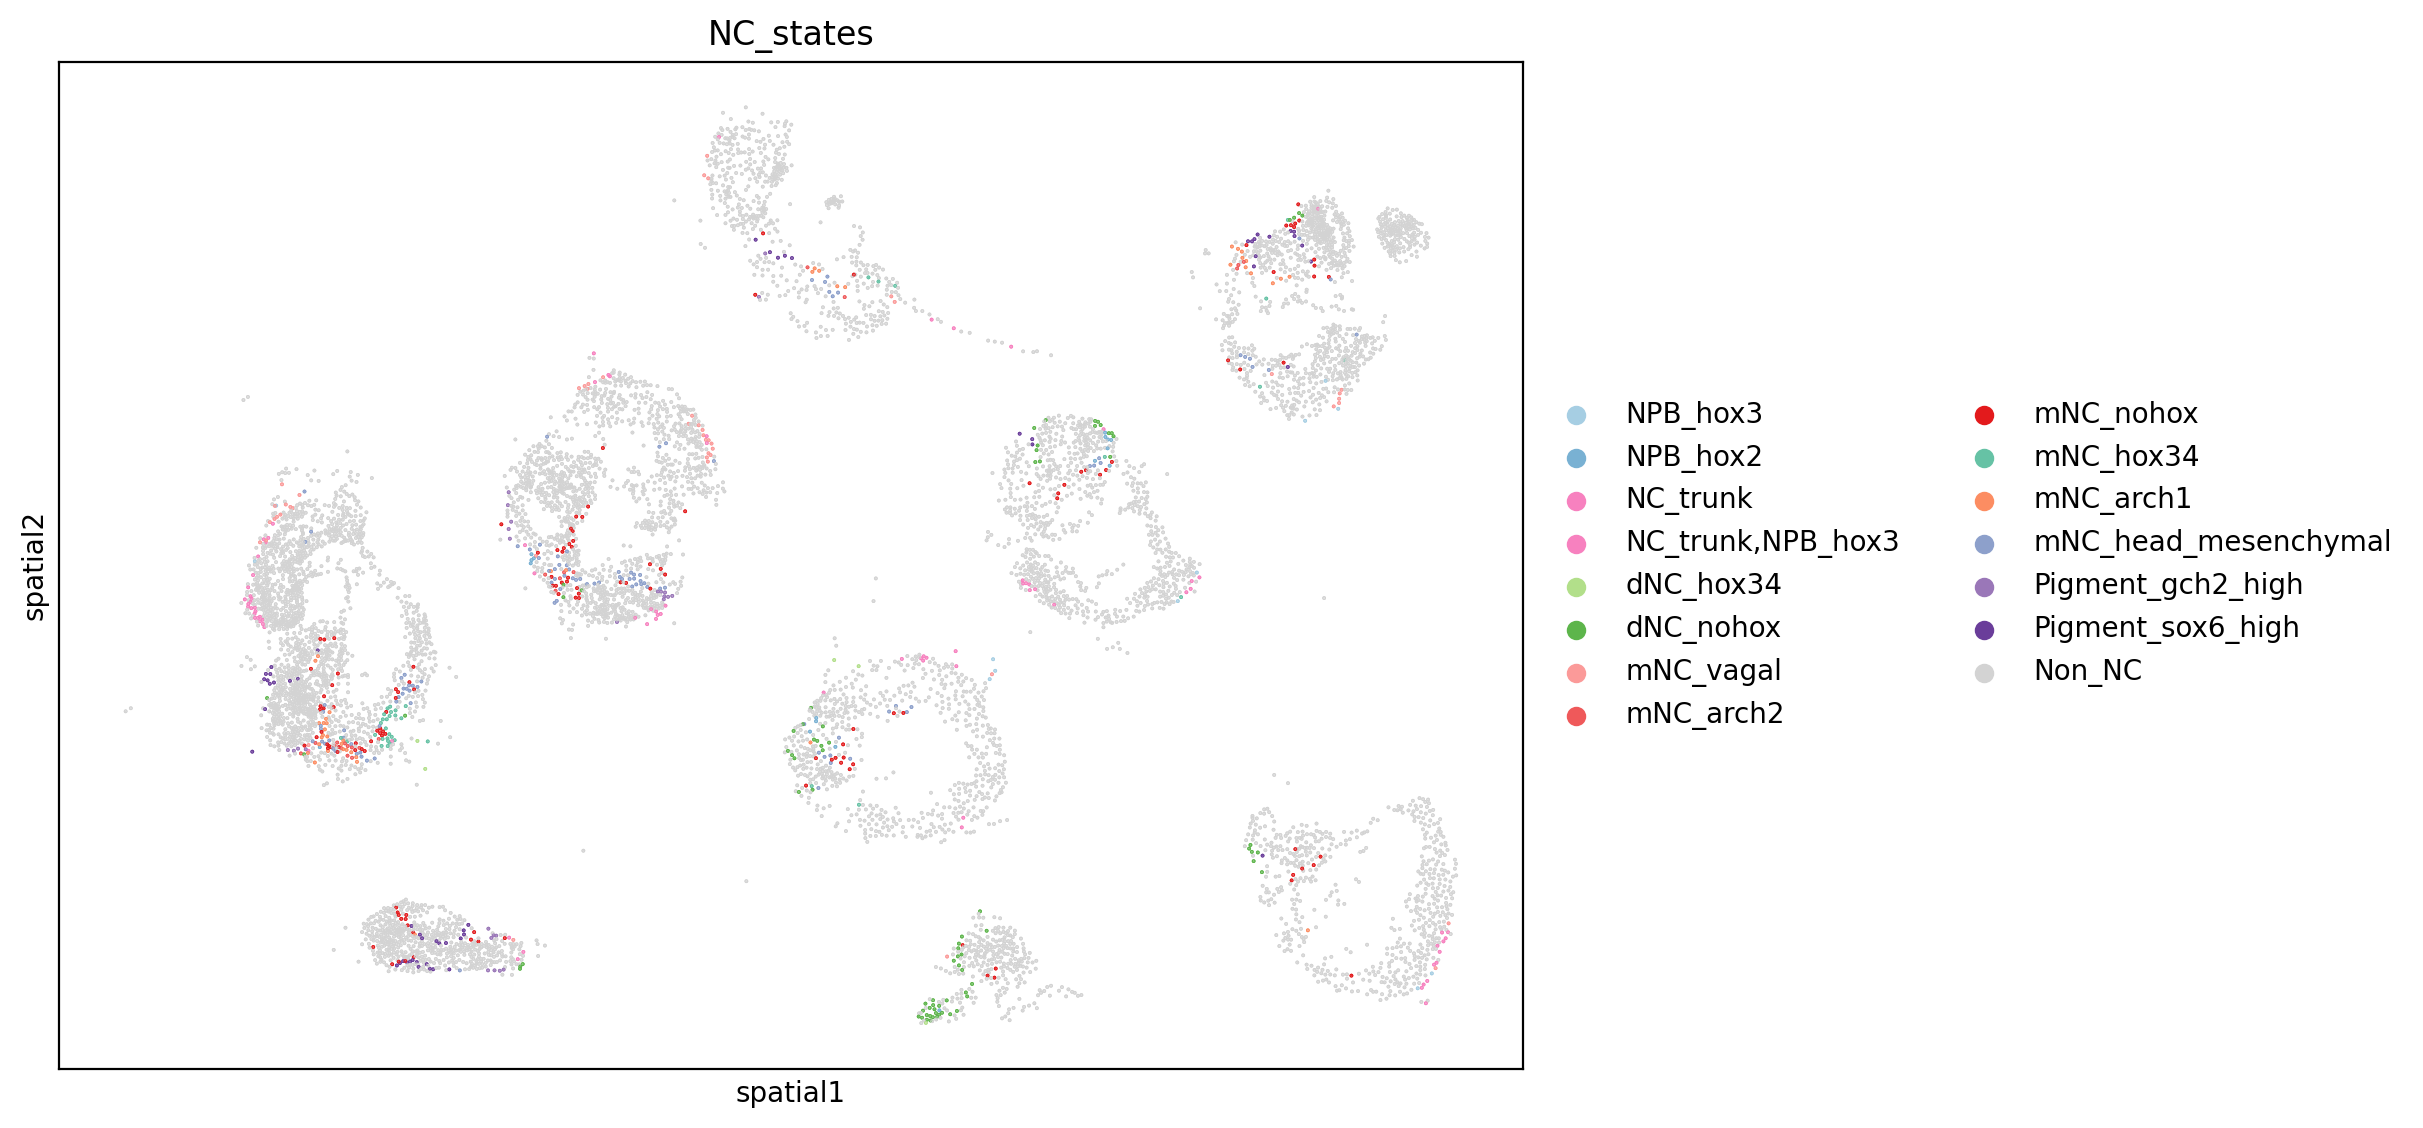

In [15]:
sq.pl.spatial_scatter(
    ad_sp_all[ad_sp_all.obsm['spatial'][:, 1] > 6100].copy(),
    shape=None,
    color=[
        "NC_states",
    ],figsize=(12,12), size = 0.5,
    wspace=0,palette=custom_colormap,
    dpi=200, save="/home/huzhiy/projects_ox/merscope/analysis/clustering_mapping/figures/run1/ad_sp_all_NCstates_top.pdf"
)

/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


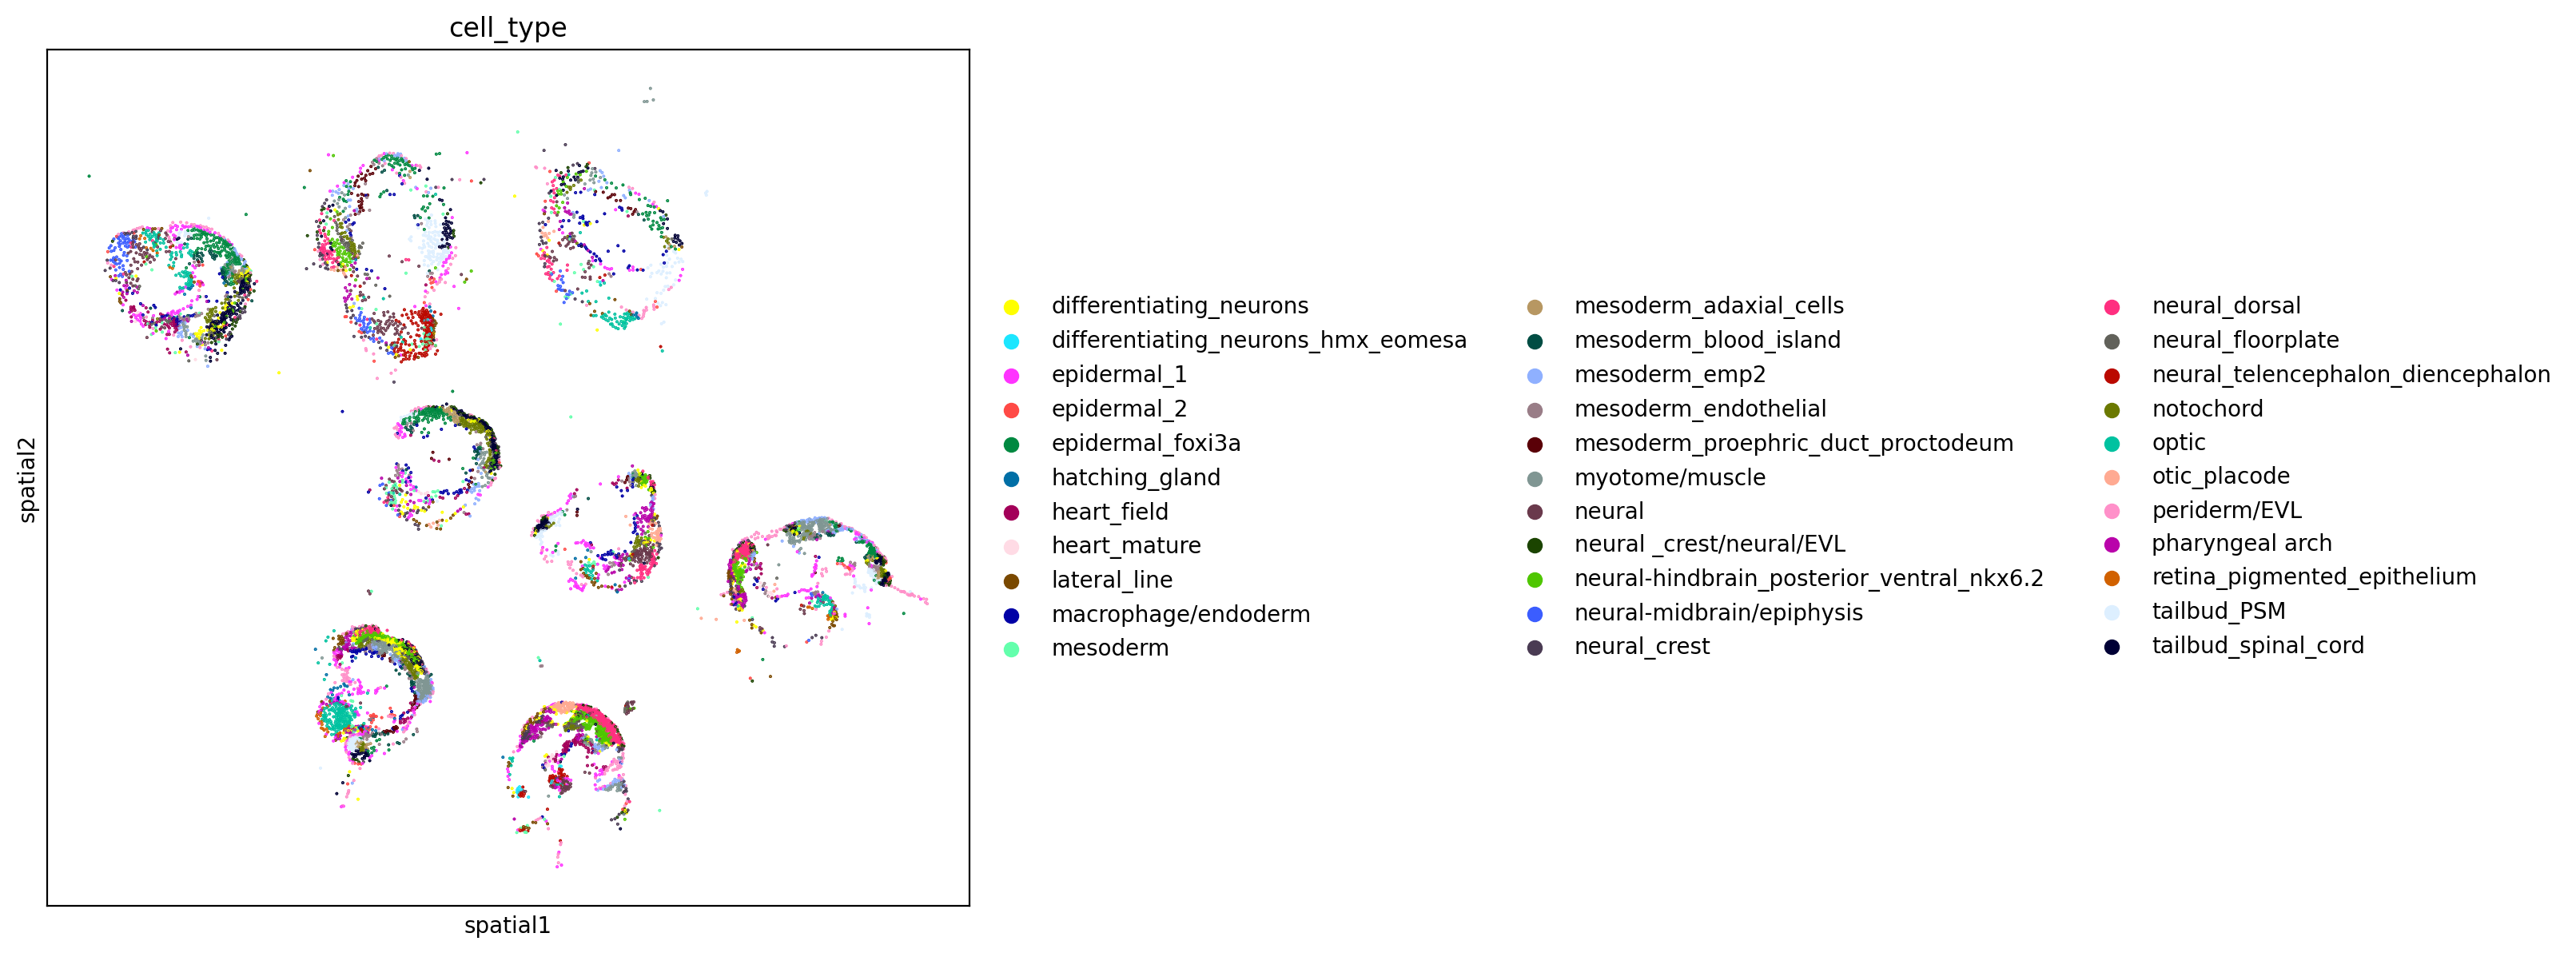

In [16]:
sq.pl.spatial_scatter(
    ad_sp_all[ad_sp_all.obsm['spatial'][:, 1] <= 5000].copy(),
    shape=None,
    color=[
        "cell_type",
    ],figsize=(16,12), size = 0.5,
    wspace=0.4,
    dpi=200, save="/home/huzhiy/projects_ox/merscope/analysis/clustering_mapping/figures/run1/ad_sp_all_cellType_top.pdf"
)

/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


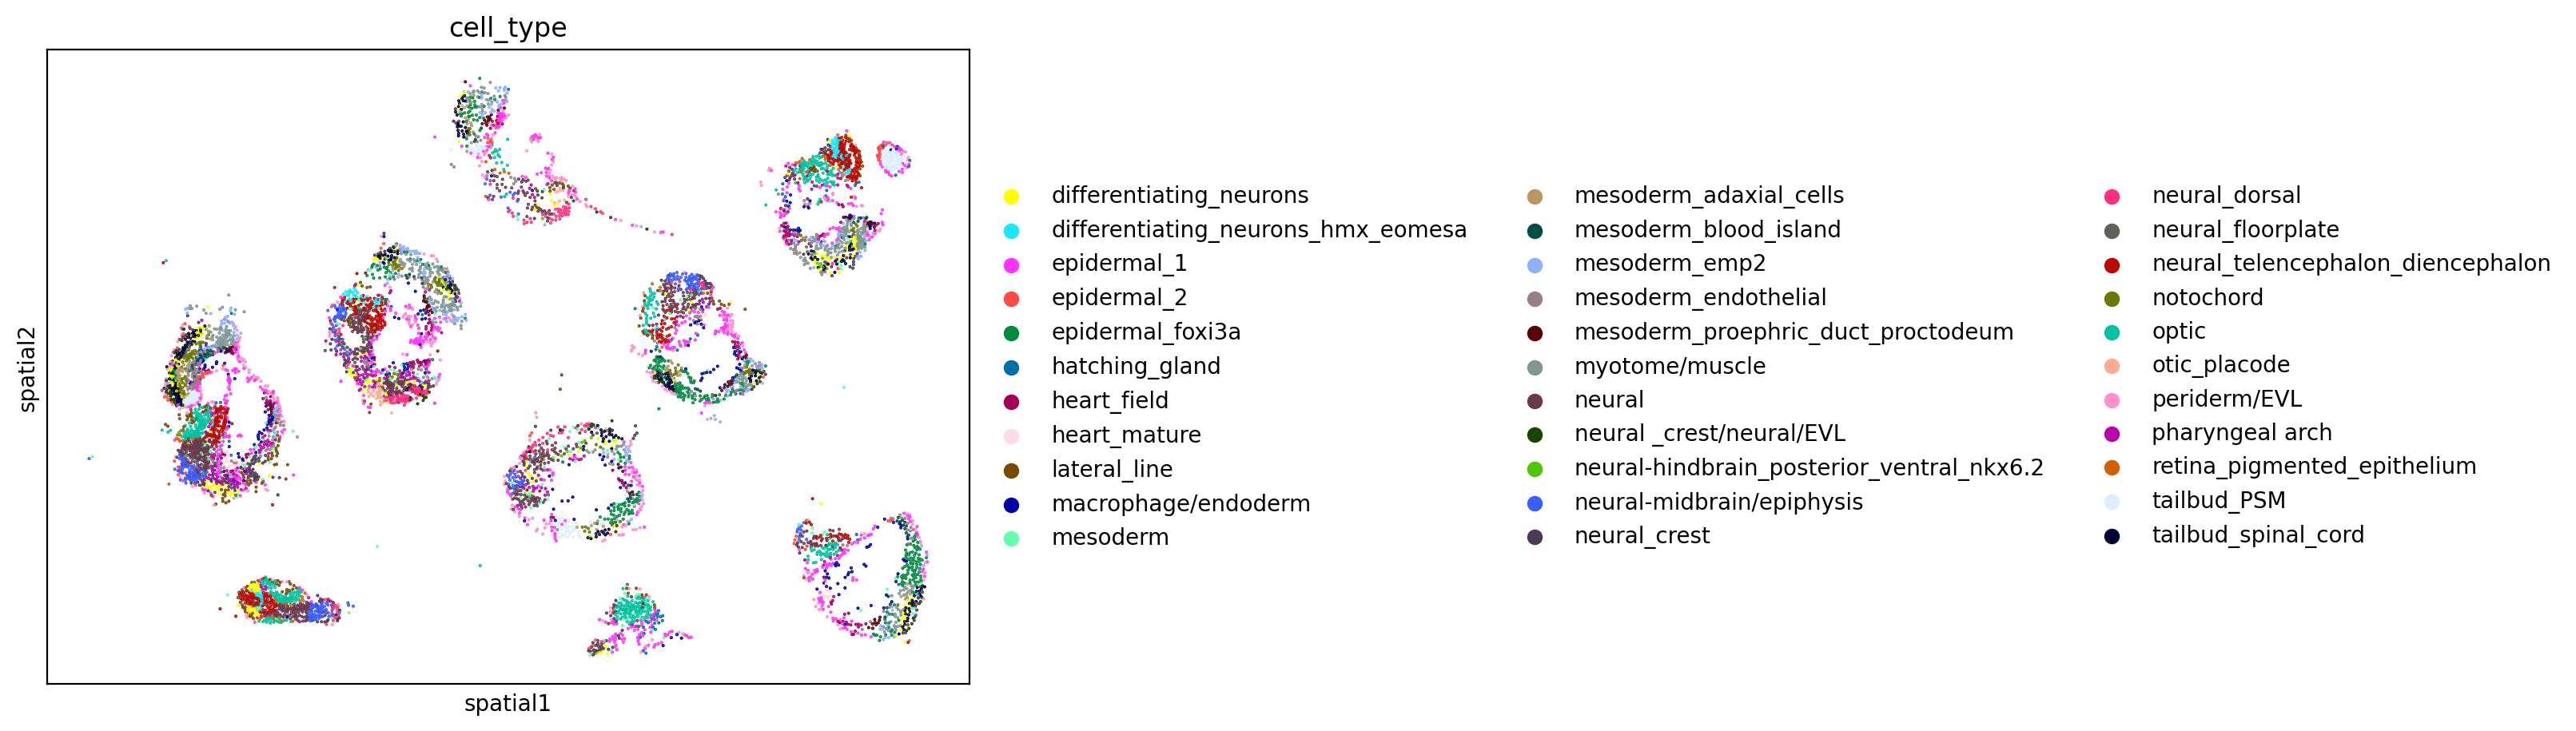

In [17]:
sq.pl.spatial_scatter(
    ad_sp_all[ad_sp_all.obsm['spatial'][:, 1] > 6100].copy(),
    shape=None,
    color=[
        "cell_type",
    ],figsize=(16,12), size = 0.5,
    wspace=0.4,
    dpi=200, save="/home/huzhiy/projects_ox/merscope/analysis/clustering_mapping/figures/run1/ad_sp_all_cellType_bottom.pdf"
)

## plot heatmap

In [18]:
# export better pdf: https://github.com/scverse/scanpy/issues/1720
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'
#sc.set_figure_params(editable_fonts=True)

In [19]:
import os
os.chdir("/home/huzhiy/projects_ox/merscope/analysis/clustering_mapping/")

### gene rank heatmap

/home/huzhiy/.local/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/huzhiy/.local/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/huzhiy/.local/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/huzhiy/.local/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/huzhiy/.local/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/huzhiy/.local/lib/python3.10/

/home/huzhiy/.local/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/huzhiy/.local/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/huzhiy/.local/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to 

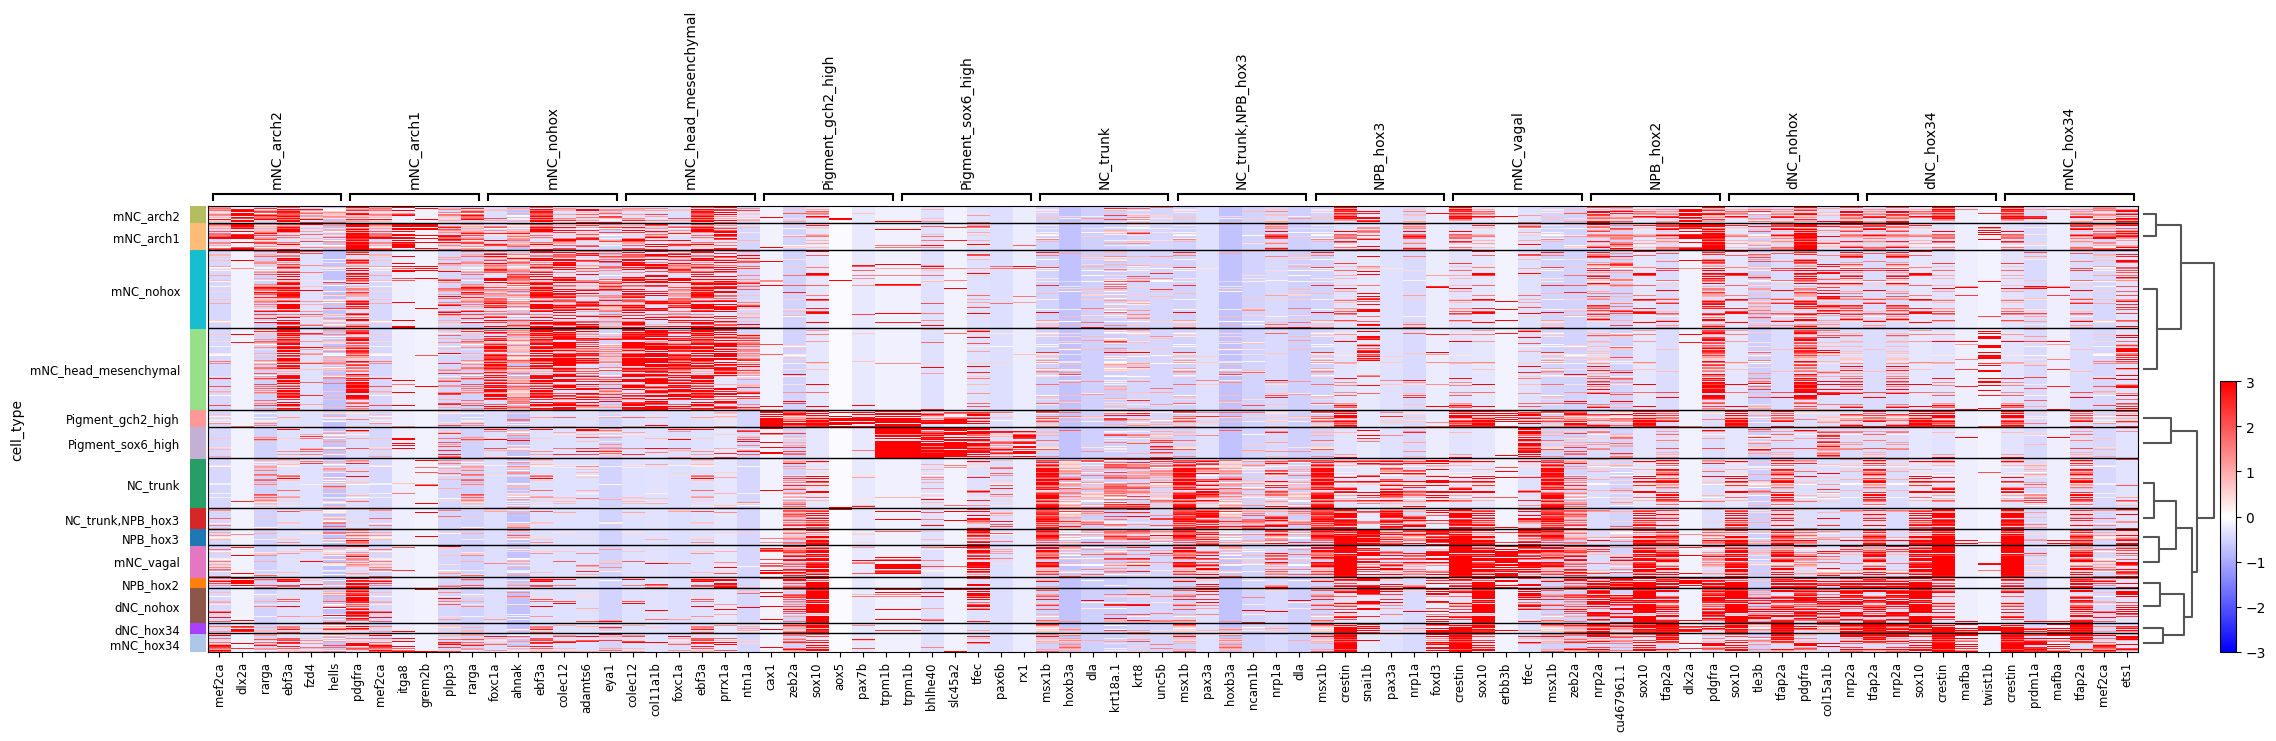

In [20]:
sc.pp.filter_genes(ad_sp, min_cells=50)

sc.tl.rank_genes_groups(ad_sp, 'cell_type')
sc.pl.rank_genes_groups_heatmap(
    ad_sp , n_genes=6, show_gene_labels=True, vmin=-3, vmax=3, cmap='bwr', 
    save="run1_heatmap.pdf"#,  groupby="cell_type", use_raw=False, vmin=-3, vmax=3, cmap='bwr',show=True,swap_axes=True,figsize=(10,7), var_group_rotation=0, dendrogram=True
)

In [21]:
ad_sp.obs["cell_type"].value_counts()

cell_type
mNC_head_mesenchymal    281
mNC_nohox               273
NC_trunk                172
dNC_nohox               120
mNC_vagal               111
Pigment_sox6_high       109
mNC_arch1                93
NC_trunk,NPB_hox3        72
mNC_hox34                63
Pigment_gch2_high        60
mNC_arch2                59
NPB_hox3                 58
dNC_hox34                37
NPB_hox2                 37
Name: count, dtype: int64

### dot plot

categories: NPB_hox3, NPB_hox2, NC_trunk, etc.
var_group_labels: mNC_arch2, NC


/home/huzhiy/.local/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/huzhiy/.local/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/huzhiy/.local/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


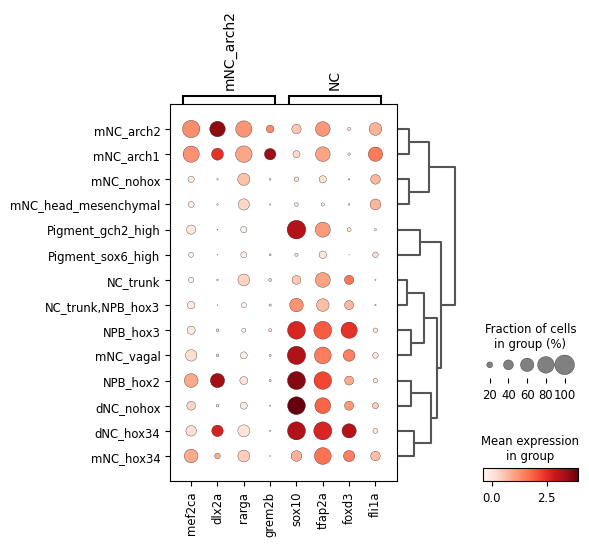

In [22]:
marker_genes_dict = {
    "mNC_arch2": ["mef2ca", "dlx2a","rarga","grem2b"],
    "NC": ["sox10","tfap2a","foxd3","fli1a"],
    
}

sc.pl.dotplot(ad_sp, marker_genes_dict, "cell_type", dendrogram=True)

## seperate NC and non-NC derived head mes

In [23]:
ad_sp.obs["cell_type"].value_counts()

cell_type
mNC_head_mesenchymal    281
mNC_nohox               273
NC_trunk                172
dNC_nohox               120
mNC_vagal               111
Pigment_sox6_high       109
mNC_arch1                93
NC_trunk,NPB_hox3        72
mNC_hox34                63
Pigment_gch2_high        60
mNC_arch2                59
NPB_hox3                 58
dNC_hox34                37
NPB_hox2                 37
Name: count, dtype: int64

In [24]:
ad_sp.raw

In [25]:
## gpt4 code adapted

# Define the marker genes
nc_markers = ["grem2b", "foxd3", "sox10", "tfap2a", "zeb2a", "crestin"]

# Check if the marker genes are in the dataset
if not set(nc_markers).issubset(set(ad_sp.var_names)):
    raise ValueError("Some of the specified markers are not in the dataset")

# Get the indices of the marker genes
gene_indices = np.where(ad_sp.var_names.isin(nc_markers))[0]

# Ensure 'counts' is present and correctly referenced
if 'counts' in ad_sp.layers:
    # Extract the relevant columns for marker genes using the indices
    gene_expression_matrix = ad_sp.layers['counts'][:, gene_indices]

    # Create a mask for cells where all marker genes have expression < 1
    # Use `.toarray()` to work with actual values since we're using numpy operations that require dense format
    marker_expr_mask = np.all(gene_expression_matrix.toarray() < 1, axis=1)
else:
    raise ValueError("The 'counts' layer is not available in the AnnData object.")

# Output or further processing can follow
marker_expr_mask

array([False, False, False, ..., False, False, False])

In [26]:

# Initialize the new column with default values from 'cell_type' and add new potential categories
ad_sp.obs['cell_type_new'] = ad_sp.obs['cell_type'].astype('category')
ad_sp.obs['cell_type_new'] = ad_sp.obs['cell_type_new'].cat.add_categories(['mNC_nohox_like','nonNC_head_mes'])

# Update the new column based on conditions
condition = marker_expr_mask & ad_sp.obs['cell_type'].isin(['mNC_head_mesenchymal', 'mNC_nohox'])
ad_sp.obs.loc[condition, 'cell_type_new'] = 'mNC_nohox_like'

# Further refine the new column based on the existing 'cell_type' annotations
ad_sp.obs.loc[(ad_sp.obs['cell_type_new'] == 'mNC_nohox_like') & (ad_sp.obs['cell_type'].str.contains('mNC_head_mesenchymal')), 'cell_type_new'] = 'nonNC_head_mes'


In [27]:
ad_sp.obs['cell_type_new'].value_counts()

cell_type_new
NC_trunk                172
nonNC_head_mes          171
mNC_nohox_like          138
mNC_nohox               135
dNC_nohox               120
mNC_vagal               111
mNC_head_mesenchymal    110
Pigment_sox6_high       109
mNC_arch1                93
NC_trunk,NPB_hox3        72
mNC_hox34                63
Pigment_gch2_high        60
mNC_arch2                59
NPB_hox3                 58
dNC_hox34                37
NPB_hox2                 37
Name: count, dtype: int64

/home/huzhiy/.local/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/huzhiy/.local/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/huzhiy/.local/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/huzhiy/.local/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/huzhiy/.local/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/huzhiy/.local/lib/python3.10/

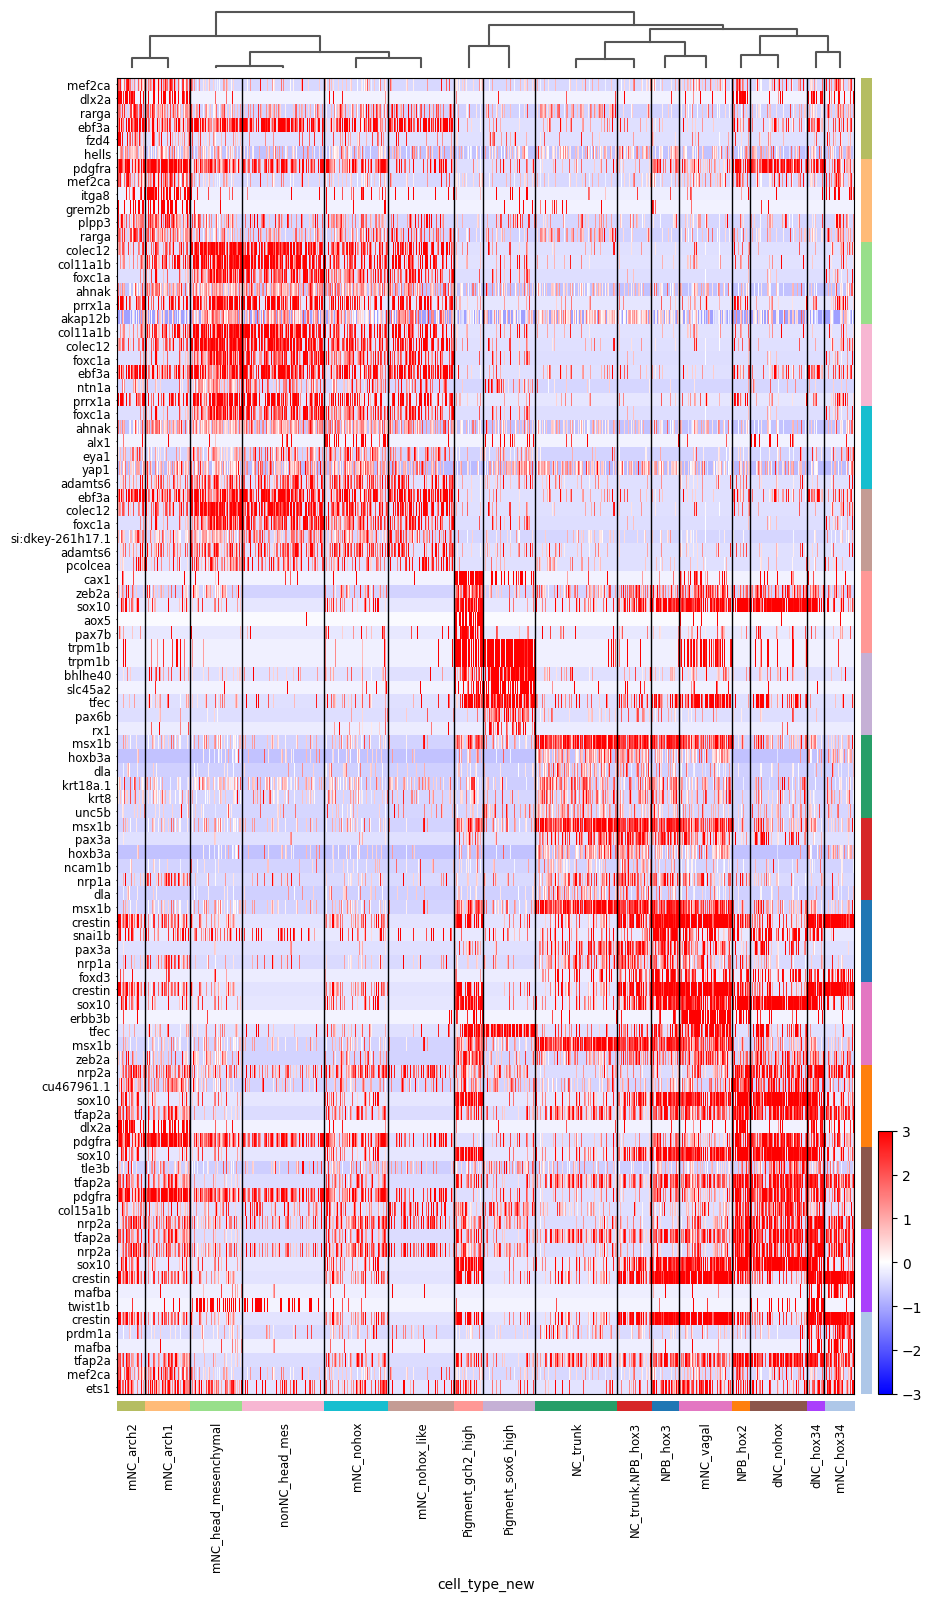

In [28]:
ad_sp.obs['cell_type_new'] = ad_sp.obs['cell_type_new'].astype('category')
sc.tl.rank_genes_groups(ad_sp, 'cell_type_new')
# Assuming ad_sp is your AnnData object and cell_type_new is the variable you're using for grouping
if 'cell_type_new' in ad_sp.obs:
    sc.tl.dendrogram(ad_sp, groupby='cell_type_new')
else:
    print("The 'cell_type_new' column is not found in ad_sp.obs")
sc.pl.rank_genes_groups_heatmap(
    ad_sp , n_genes=6, show_gene_labels=True, vmin=-3, vmax=3, cmap='bwr',swap_axes = True,
    save="run1_heatmap_cell_type_new.pdf"#,  groupby="cell_type", use_raw=False, vmin=-3, vmax=3, cmap='bwr',show=True,swap_axes=True,figsize=(10,7), var_group_rotation=0, dendrogram=True
)

In [29]:
ad_sp_all.obs['NC_states2'] = "Non_NC"
# Map cell_type to NC_states based on the index
ad_sp_all.obs.loc[ad_sp.obs.index, 'NC_states2'] = ad_sp.obs['cell_type_new']
# Print a summary to verify the changes
print(ad_sp_all.obs['NC_states2'].head())

1705254700003100421_region_0       Non_NC
1705254700003100442_region_0       Non_NC
1705254700003100443_region_0       Non_NC
1705254700003100450_region_0       Non_NC
1705254700003100462_region_0    mNC_nohox
Name: NC_states2, dtype: object


In [30]:
my_palette = {'NPB_hox3': '#A6CEE3',
 'NPB_hox2': '#79B1D3',
 # 'NPB_nohox': '#4C94C3',
 'NC_trunk': '#F781BF',
 'NC_trunk,NPB_hox3': '#F781BF',
 'dNC_hox34': '#B2DF8A',
 # 'dNC_hoxa2b': '#87CA6A',
 'dNC_nohox': '#5DB54B',
 # 'dNC_nohox_cycling': '#33A02C',
 'mNC_vagal': '#FB9A99',
 'mNC_arch2': '#EF595A',
 'mNC_nohox': '#E31A1C',
 'mNC_hox34': '#66C2A5',
 'mNC_arch1': '#FC8D62',
 'mNC_head_mesenchymal': '#8DA0CB',
 'Pigment_gch2_high': '#9A77B8',
 'Pigment_sox6_high': '#6A3D9A',
 'Non_NC': '#D3D3D3',
 'mNC_nohox_like': '#D3D3D3',
 'nonNC_head_mes': '#D3D3D3'
             }
from matplotlib.colors import ListedColormap
# Create a ListedColormap from the list of colors
custom_colormap = ListedColormap(list(my_palette.values()))
custom_colormap

ad_sp_all.obs['NC_states2'] = pd.Categorical(ad_sp_all.obs['NC_states2'],
                                                        categories=my_palette.keys(),
                                                        ordered=True)

/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


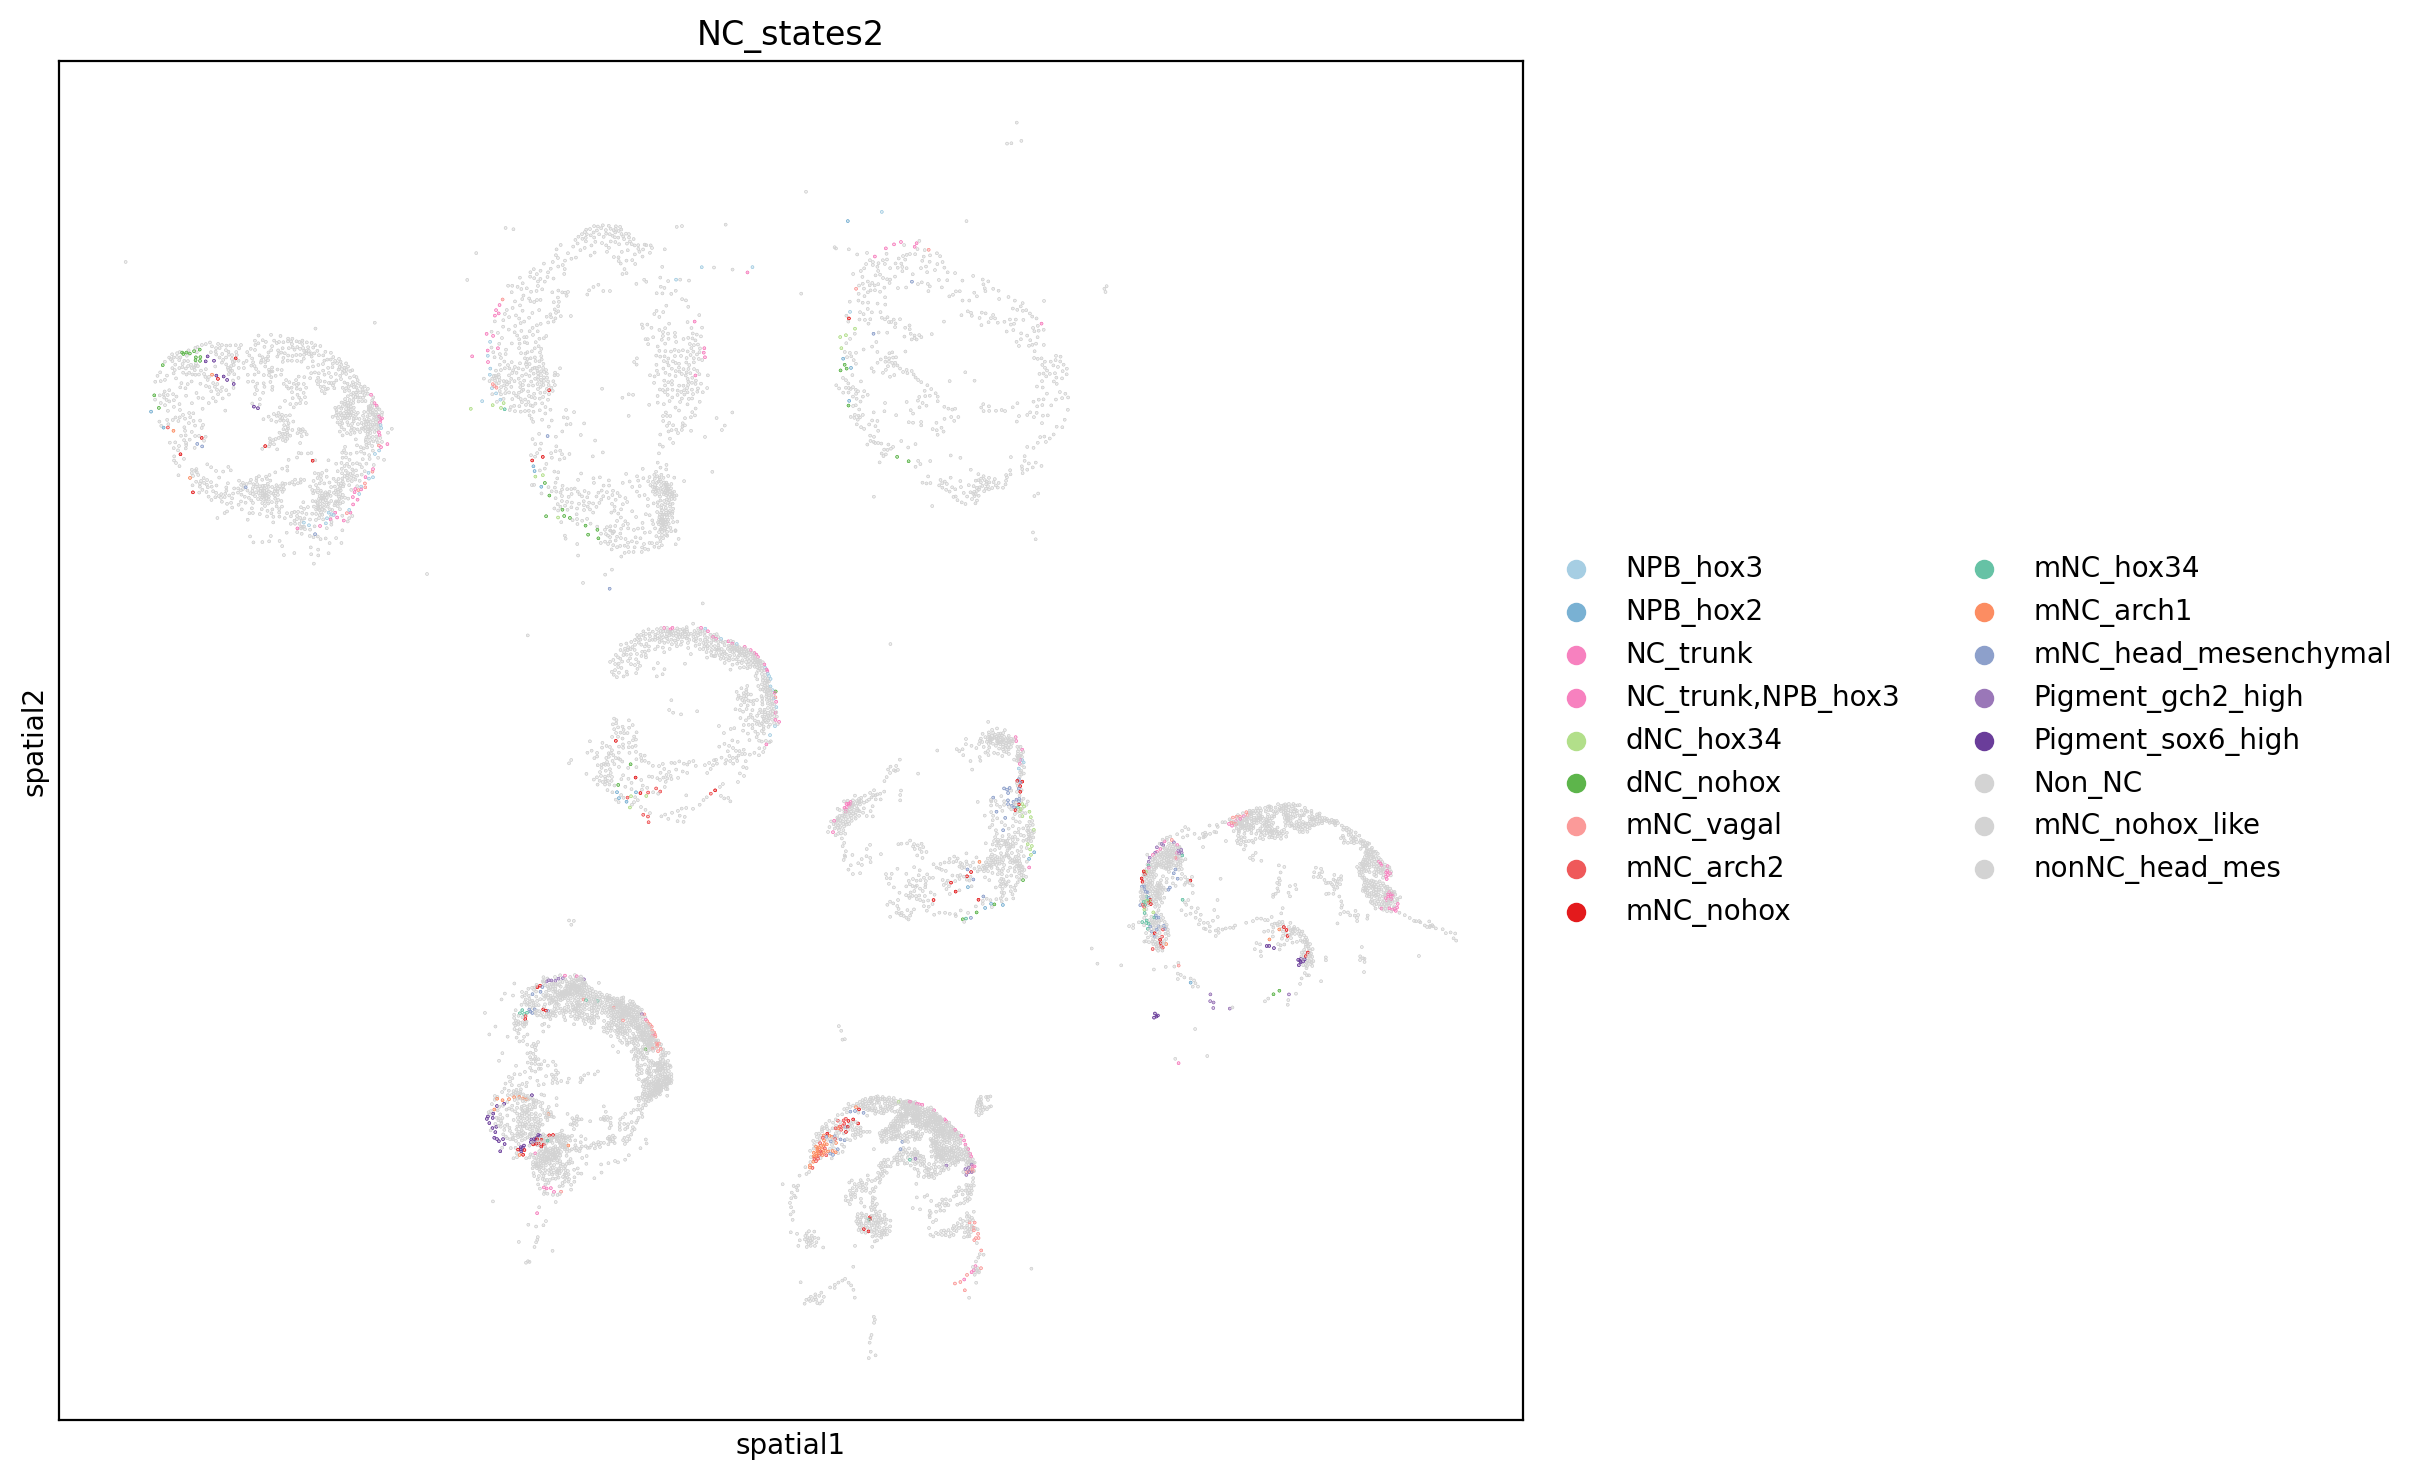

In [31]:
sq.pl.spatial_scatter(
    ad_sp_all[ad_sp_all.obsm['spatial'][:, 1] <= 5000].copy(),
    shape=None,
    color=[
        "NC_states2",
    ],figsize=(12,12), size = 0.2,
    wspace=0,palette=custom_colormap,
    dpi=200, save="/home/huzhiy/projects_ox/merscope/analysis/clustering_mapping/figures/run1/ad_sp_all_NCstates2_bottom.pdf"
)

/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


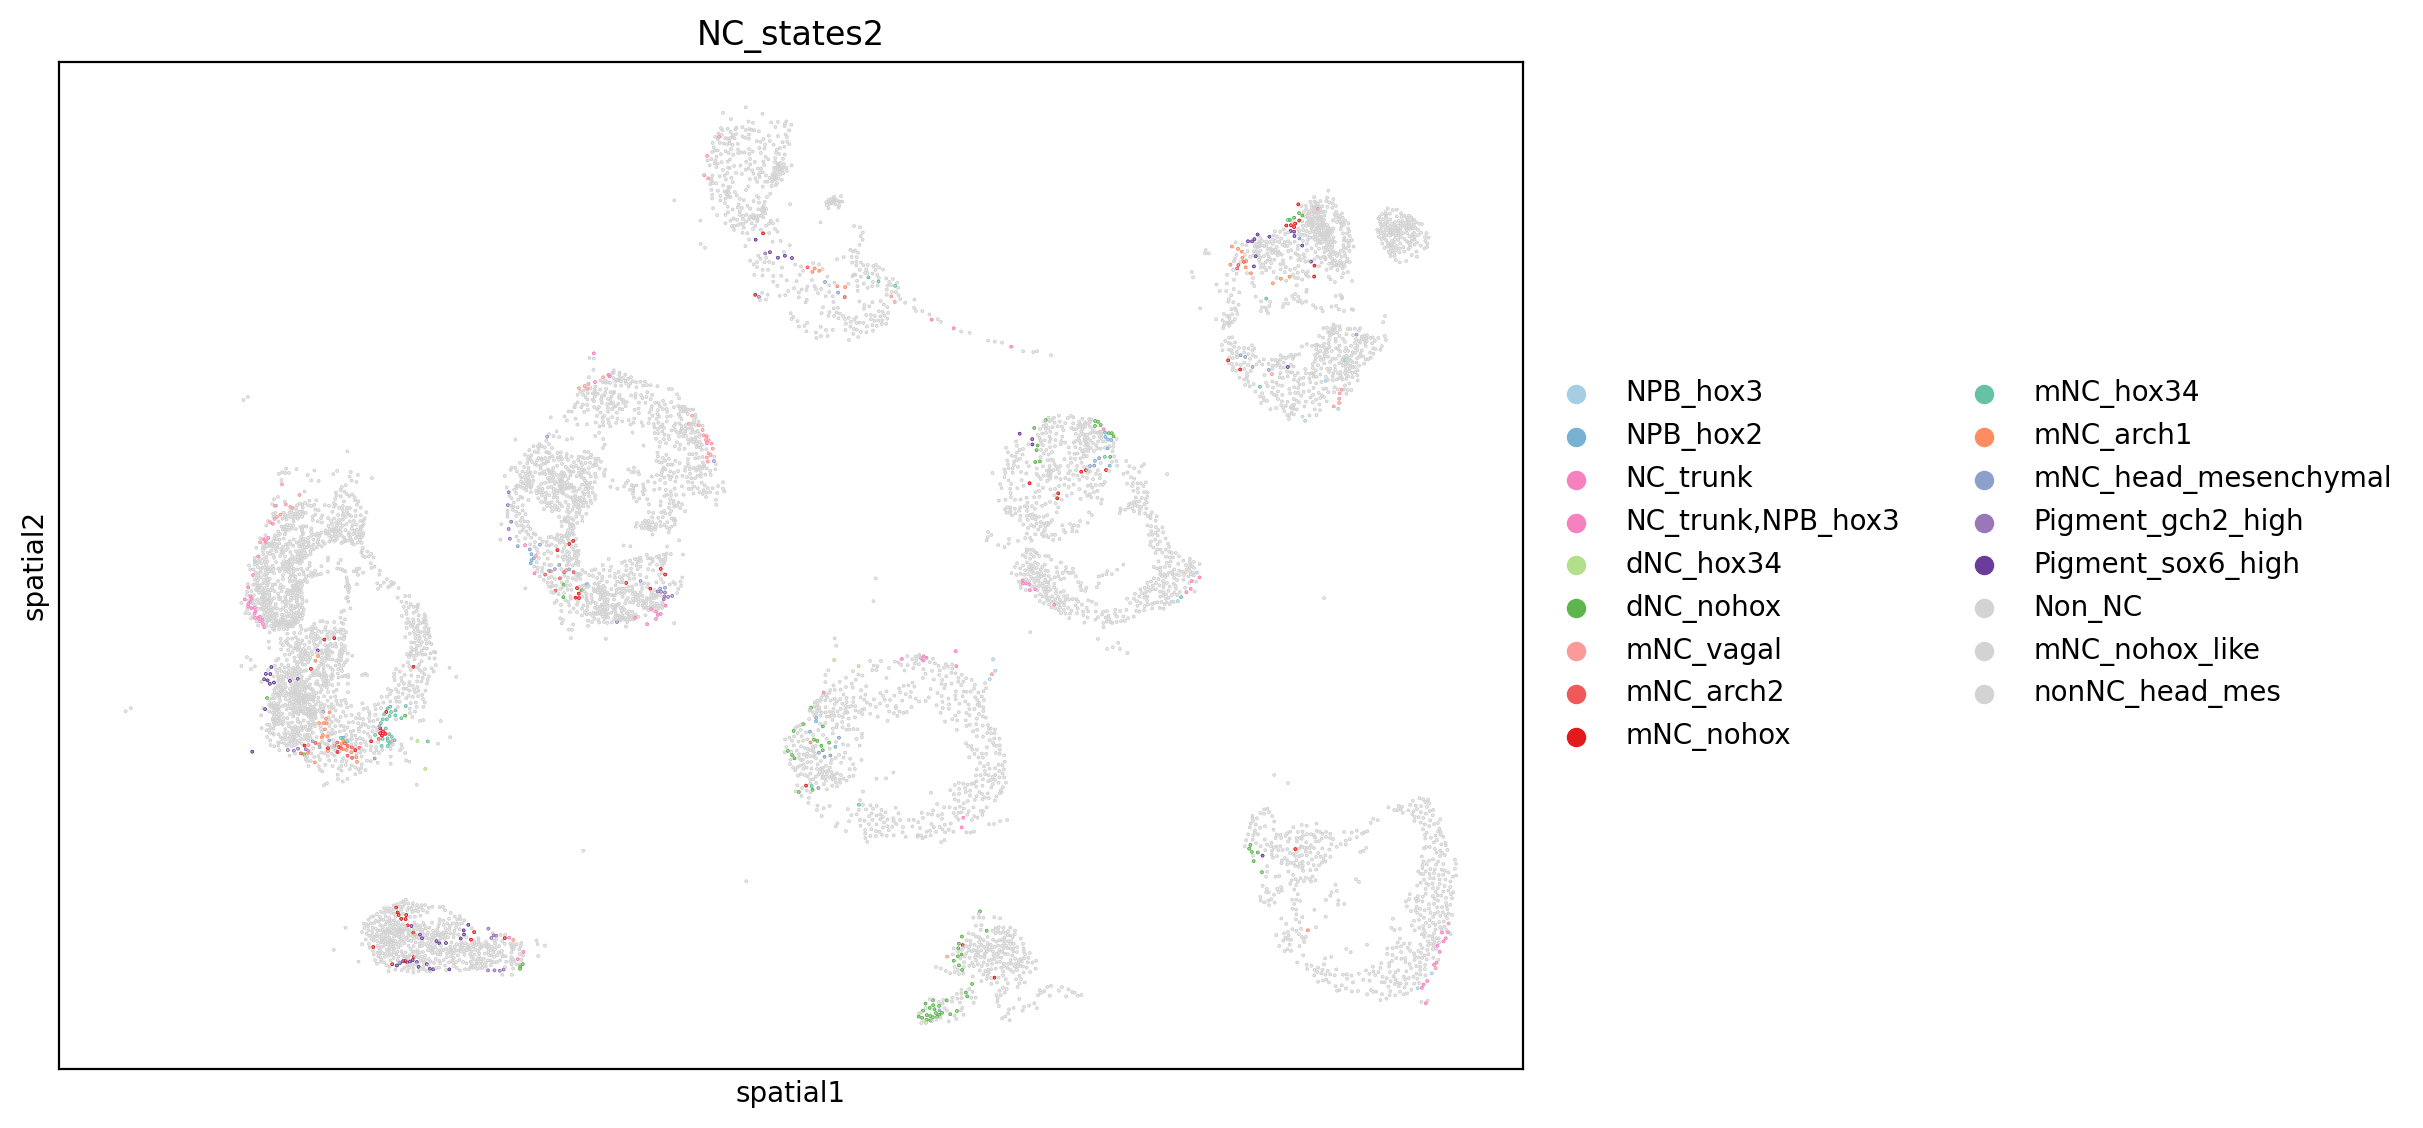

In [32]:
sq.pl.spatial_scatter(
    ad_sp_all[ad_sp_all.obsm['spatial'][:, 1] > 6100].copy(),
    shape=None,
    color=[
        "NC_states2",
    ],figsize=(12,12), size = 0.3,
    wspace=0,palette=custom_colormap,
    dpi=200, save="/home/huzhiy/projects_ox/merscope/analysis/clustering_mapping/figures/run1/ad_sp_all_NCstates2_top.pdf"
)

In [34]:
ad_sp.write_h5ad("/home/huzhiy/projects_ox/merscope/analysis/clustering_mapping/figures/run1/ad_sp_NC_annotated.h5ad")
ad_sp_all.write_h5ad("/home/huzhiy/projects_ox/merscope/analysis/clustering_mapping/figures/run1/ad_sp_allCells_annotated.h5ad")